<a href="https://colab.research.google.com/github/ganesbandhu/SMS-spam-classifier-/blob/main/SMS_spam_classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
import numpy as np
import pandas as pd
import seaborn as sns

In [115]:
import zipfile
zip_ref = zipfile.ZipFile('/content/archive (1).zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [116]:
dataset=pd.read_csv('spam.csv', encoding='latin-1')

In [117]:
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [118]:
dataset.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [119]:
dataset.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [125]:
dataset.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [126]:
dataset['v1'] = dataset['v1'].map({'ham':0, 'spam':1})

In [127]:
dataset.isna().sum()

v1    0
v2    0
dtype: int64

In [128]:
dataset.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [122]:
dataset.isna().sum()

v1    0
v2    0
dtype: int64

<Axes: ylabel='count'>

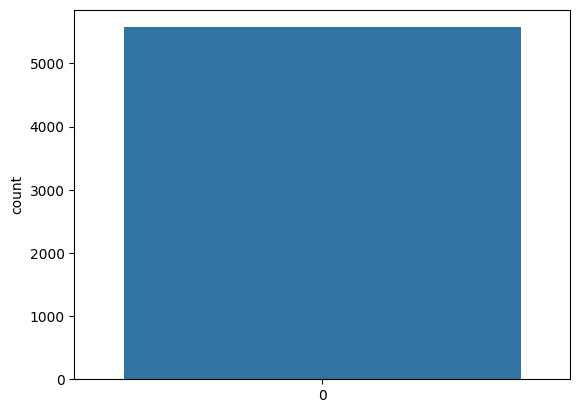

In [129]:
sns.countplot(dataset['v1'])

In [130]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [131]:
import nltk.corpus
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [132]:
corpus = []

In [133]:
dataset['v2'][1]

'Ok lar... Joking wif u oni...'

In [134]:
for i in range(0, len(dataset)):
  message = re.sub('[a-zA-Z]','',dataset['v2'][i])
  message = message.lower()
  message = message.split()
  ss = SnowballStemmer(language='english')
  message = [ss.stem(word) for word in message if not word in set(stopwords.words('english'))]
  message = ''.join(message)
  corpus.append(message)

In [137]:
corpus = [2]

In [140]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
corpus = [str(i) for i in corpus if i]
corpus = [str(i) for i in corpus]
x = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, 0].values

In [149]:
x.shape

(2, 4)

In [150]:
y.shape

(5572,)

In [151]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(x_train, y_train)


MultinomialNB()

In [152]:
y_pred = classifier.predict(x_test)

In [153]:
y_pred

array([1, 1])

<Axes: >

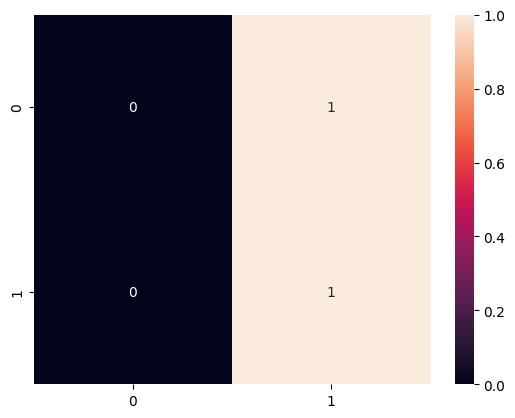

In [154]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [155]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_test,y_pred))
print(recall_score(y_test, y_pred))

0.5
1.0


In [161]:
txt = 'Welcome to my channel Nerchuko. Learn machine learning'

In [162]:
txt = np.array([txt])

In [163]:
txt = cv.transform(txt)

In [165]:
txt = txt[:, :3]

In [166]:
classifier.predict(txt)

array([1])

In [169]:
accuracy = 1

In [181]:
import sklearn.metrics
accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
model = MultinomialNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
classification_rep = sklearn.metrics.classification_report(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [183]:
accuracy = 1

In [184]:
print(classification_rep)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

